# POP Projekt - Clearing i Crowding
> Filip Ryniewicz, Miłosz Cieśla

## Temat projektu:
Na wybranym algorytmie ewolucyjnym porównaj działanie dwóch technik zwiększania rożnorodności
w populacji: metodę clearingu oraz crowdingu. W tym celu wykorzystaj wybrane przez siebie funkcje
testowe.


## Implementacja algorytmu ewolucyjnego



Zaimplementowaliśmy nasz własny algorytm genetyczny.
Działanie:
- Stworzenie populacji - Do rozwiązania naszego problemu tworzymy 100 osobników z genami będącymi losowymi liczbami rzeczywistymi z przedziału od -10 do 10.
- Następnie przez 1000 iteracji wykonujemy:
- Selekcję turniejową z kontrolą różnorodności - wielkość szranek wynosi 3, natomiast szansa na wybór losowego osobnika wynosi 0.1. Zaimplementowaliśmy ten mechanizm w celu zachowania większej różnorodności populacji.
- Krzyżowanie - każdy osobnik ma szansę 0.1 na skrzyżowanie się z losowym osobnikiem z populacji. Nowy osobnik jest tworzony na podstawie średniej ważonej ich cech. Dla każdej cechy osobnika, wagi są losowane w zakresie 0.4 do 0.6. Wprowadza to losowość która zapobiega przedwczesnej konwergencji do lokalnego minimum oraz zwiększa eksploracje.
- Mutacja - Każdy z cech osobnika ma szansę 0.05 na zmutowanie. Przy mutacji jest ona zmieniana o losową wartość generowaną z rozkładu ~ N(0, 1). Wartości są ograniczane do przestrzeni którą chcemy przeszukać(w naszym przypadku ustaliliśmy -10, 10 dla każdej cechy).
- Ewaluacja - oceniamy osobników na bazie funkcji testowych
Dodatkowe kroki:
- Crowding - dla każdego osobnika wybierane jest cf_size losowych osobników z dotychczasowej populacji, a następnie szukamy najbliższego względem niego. Jeśli ma on mniejszy wynik i jest wystarczająco blisko potomka (według distance_threshold), potomkowi przypisywana jest jego wartość, w przeciwnym razie przechodzi on dalej.
- Clearing - osobniki w populacji są dzielone na nisze na podstawie odległoście euklidesowej. W każdej z nich pozostawia się `niche_capacity` najlepszych osobników, a pozostałe zostają cleared - ustawiony score na 10000.

## Potrzebne importy

In [1]:
import sys
sys.path.append('../')

from testing_functions import *
from report_utils.plotting import  plt_all, compare_diversity_best, plt_multiple_plots, plt_multiple_plots_side_by_side, table_compare_best, compare_evolutionary_parameter
from report_utils.animations import generate_animation
from genetic_algorithm import *

## Funkcje Testowe

### Funkcja Ackleya

Wybraliśmy funkcję Ackleya ze względu na dużą ilość minimów lokalnych w których algorytm genetyczny może utknąć. Ponadto, charakteryzuje się ona symetrią i wyraźnym globalnym minimum. \
Użyliśmy powrzechnie używanych wartości parametrów: \
a = 20 \
b = 0.2 \
c = 2 π 

Minimum lokalne znajduje się w punkcie (0, 0) 

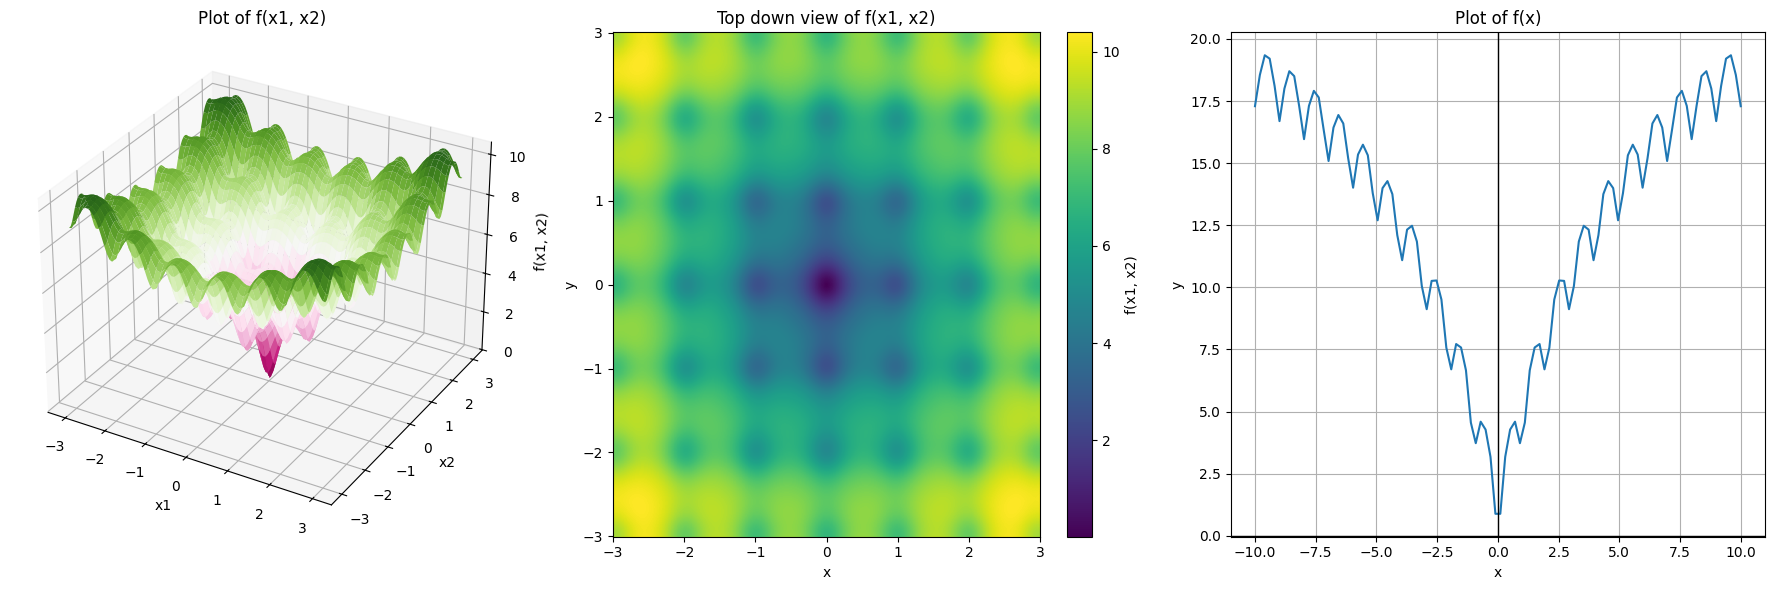

In [2]:
plt_all(ackley)

### Funkcja Rastrigina

W porównaniu do funkcji Ackleya, funkcja Rastrigina charakteryzuje się znacznie bardziej regularnym rozkładem minimów lokalnych, co sprawia, że znalezienie globalnego minimum jest trudniejsze. Przyda się on w naszych eksperymentach do oceny zdolności eksploracyjnych.

Dobrany parametr: \
a = 10

Minimum lokalne znajduje się w punkcie (0, 0)

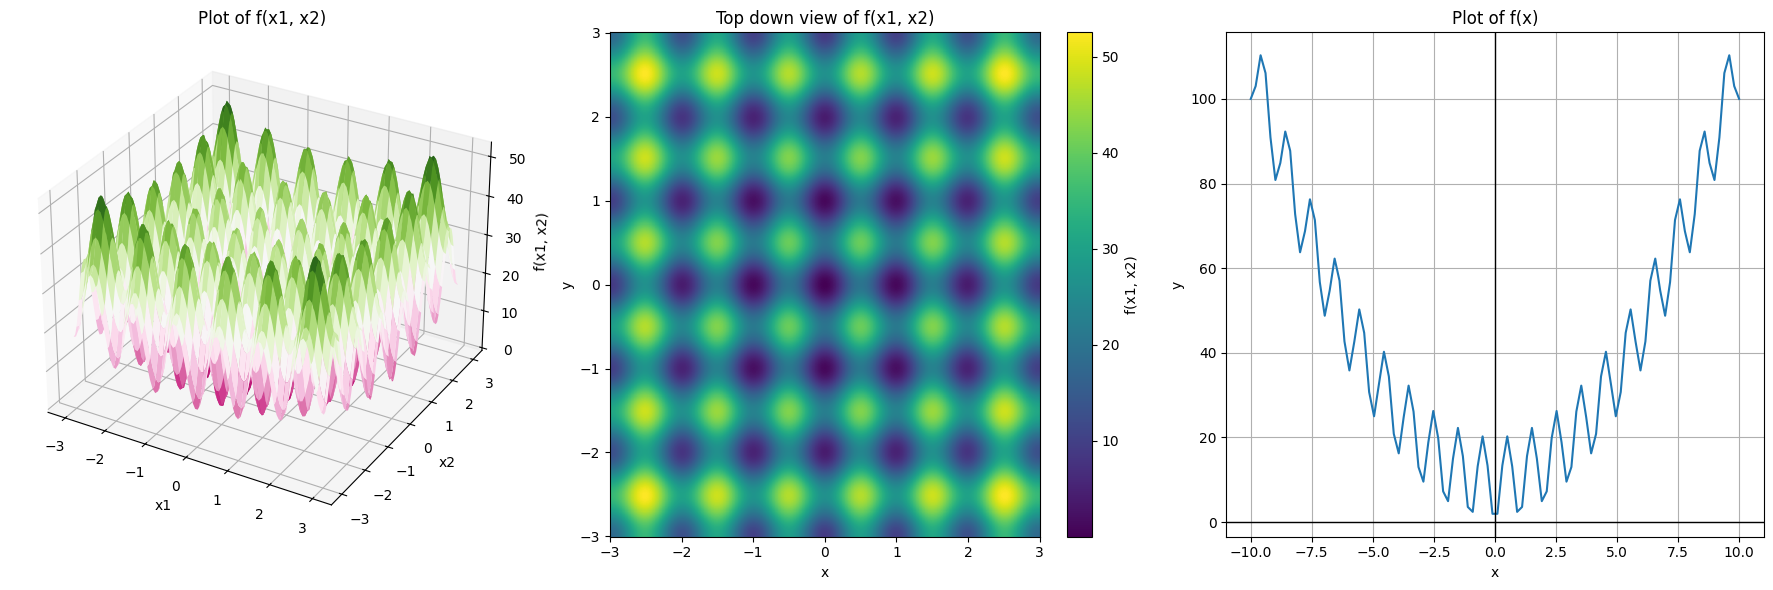

In [3]:
plt_all(rastrigin)

### Funkcja Rosenbrocka

Wymaga ona od modelu precyzji i zdolności eksploracyjnych, ponieważ globalne minimum znajduje się w wąskiej, zakrzywionej dolinie. Jest ona trudno dostępna z większości punktów początkowych, co może stanowić wyzwanie dla naszych modeli. Dodatkowo, w jej wnętrzu nachylenie w kierunku globalnego minimum jest łagodne. 

Dobrane parametry: \
a = 1 \
b = 100 

Minimum lokalne znajduje się w punkcie (1, 1) 


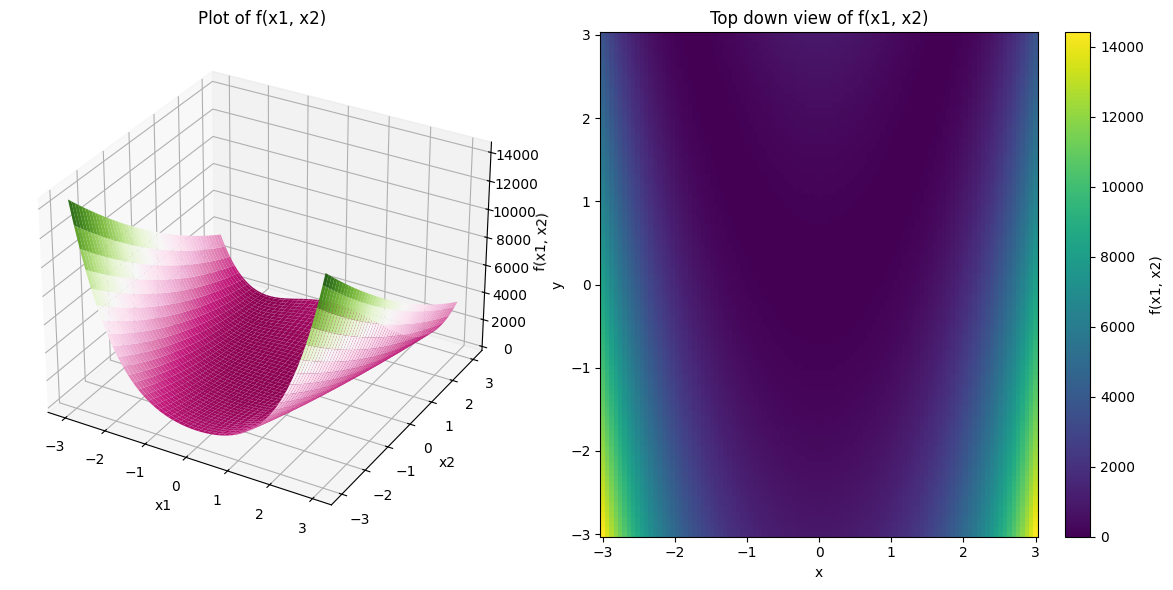

In [4]:
plt_all(rosenbrock, plot2D=False)

Uważamy, że te trzy funkcje doskonale nadają się do kompleksowej oceny skuteczności metod crowdingu i clearingu. Crowding, dzięki swojej zdolności do wspierania eksploracji przestrzeni poszukiwań i utrzymywania różnorodności populacji, powinien efektywnie radzić sobie z licznymi minimami lokalnymi charakterystycznymi dla funkcji takich jak Ackleya czy Rastrigina. Z kolei clearing, który wzmacnia eksplorację najbardziej obiecujących regionów przestrzeni, znajduje szczególne zastosowanie w przypadku funkcji Rosenbrocka, gdzie precyzyjne prowadzenie optymalizacji w wąskiej dolinie jest kluczowe dla osiągnięcia globalnego minimum.

## Badanie wpływu wartości parametrów funkcji clearingu i crowdingu na działanie algorytmu
Te eksperymenty przeprowadzimy na funkcji Ackleya. Wybierzemy stosowne wartości testowanych parametrów i będziemy z nich korzystać w dalszych eksperymentach.

### Wpływ `cf_size` na crowding

Crowding factor w algorytmie crowdingu odpowiada za liczbę osobników z którymi potomek musi konkurować o miejsce w populacji. W tym eksperymencie sprawdzimy jak zachowuje się populacja w zależności od dobrania wartości tego parametru.

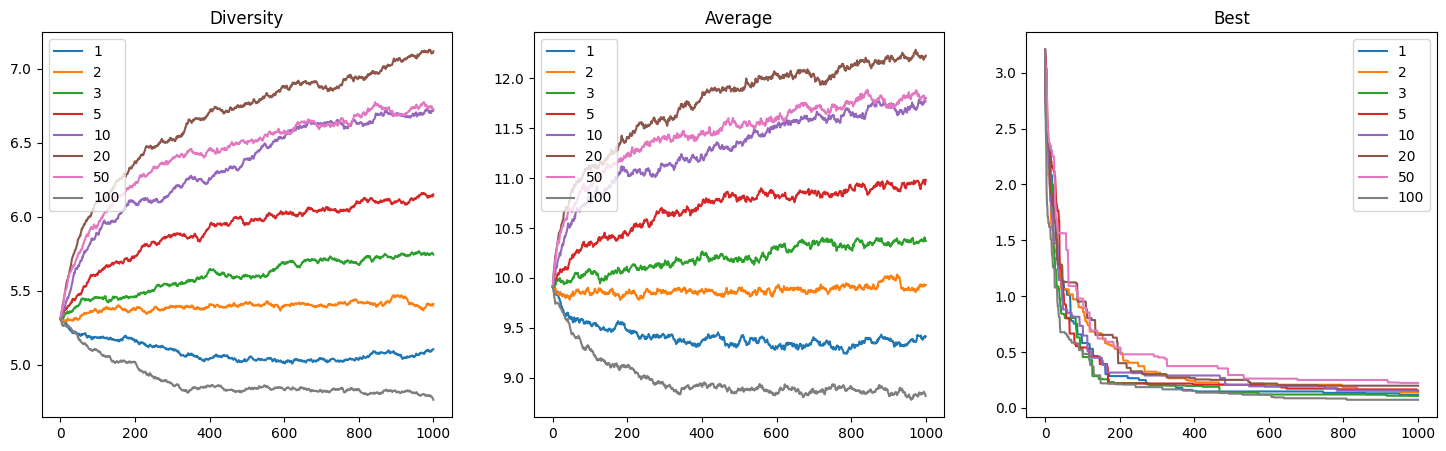

,x,y,score
1,0.003485,0.014047,0.046504
2,-0.008131,-0.011744,0.045828
3,-0.014579,0.043627,0.185540
5,0.006324,-0.011243,0.040911
10,0.016705,0.024562,0.107370
20,-0.028968,0.001778,0.104364
50,-0.015568,-0.029031,0.121848
100,0.016297,-0.010608,0.065043


In [5]:
cf_sizes = [1, 2, 3, 5, 10, 20, 50, 100]
# cf_sizes = [1]
diversities, averages, best_scores, best_individuals = compare_evolutionary_parameter(ackley, cf_sizes, 'cf_size', crowding)
plt_multiple_plots_side_by_side([diversities, averages, best_scores], cf_sizes, titles=["Diversity", "Average", "Best"])

df = table_compare_best(best_individuals, cf_sizes)
df.T

### Wnioski cf_size: 
Dla populacji składającej się ze 100 osobników, przy cf_size = 2 obserwujemy zachowanie początkowej różnorodności populacji. W przypadku skrajnych wartości (cf_size = 1 oraz cf_size = 100) algorytm szybko zbiega do stabilności, jednak wiąże się to z sukcesywnym spadkiem różnorodności.

Dla cf_size = 1, potomstwo konkuruje z losowo wybranym osobnikiem, co prowadzi do braku precyzji w rywalizacji. Taki mechanizm nie sprzyja pełnemu wykorzystaniu nisz i ogranicza efektywność selekcji. Z kolei przy cf_size = 100, potomstwo konkuruje z najbardziej podobnym osobnikiem w całej populacji, co skutkuje szybką eliminacją podobnych rozwiązań i znacznym ograniczeniem różnorodności.

Warto również zauważyć, że dla cf_size = 100 pojawia się istotny narzut obliczeniowy wynikający z konieczności porównywania każdego potomka z całą populacją. To dodatkowe obciążenie może wpływać na wydajność algorytmu, szczególnie przy większych populacjach.

Dla wartości cf_size > 20 presja selekcyjna staje się zbyt duża. Potomstwo konkuruje z coraz większą liczbą osobników, co sprzyja szybkiemu eliminowaniu różnorodnych rozwiązań, stąd pojawia się obniżenie zróżnicowania populacji oraz średnich wartości. 

### Wpływ `distance_threshold` na crowding

Distance threshold określa jaka jest maksymalna odległość między osobnikami aby zostały uznane za bliskie sobie. Odpowiada za kontrolowanie zasięgu konkurencji.


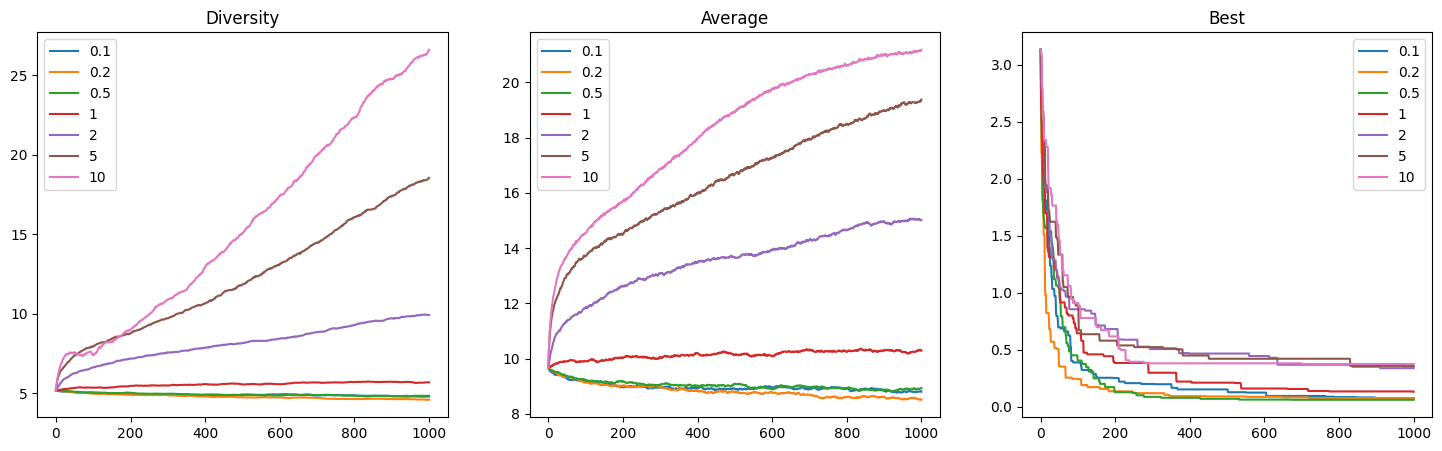

,x,y,score
0.1,0.045200,-0.006532,0.183781
0.2,0.001338,-0.003998,0.012397
0.5,-0.004934,-0.001038,0.014936
1.0,-0.077928,0.020085,0.391592
2.0,-0.038315,0.066733,0.368957
5.0,0.043157,0.081415,0.473634
10.0,0.058652,0.044432,0.347173


In [7]:
distance_thresholds = [0.1, 0.2, 0.5, 1, 2, 5, 10]
diversities, averages, best_scores, best_individuals = compare_evolutionary_parameter(ackley, distance_thresholds, 'crowding_threshold', crowding)
plt_multiple_plots_side_by_side([diversities, averages, best_scores], distance_thresholds, titles=["Diversity", "Average", "Best"])

df = table_compare_best(best_individuals, distance_thresholds)
df.T

### Wnioski distance_threshold
Zgodnie z przewidywaniami, wysoki próg ograniczający odległość względem najbliższego osobnika prowadzi do niemal liniowego wzrostu różnorodności populacji, co wynika z błędnego określenia konkurencji w danej niszy. W efekcie nowe osobniki zostają wyparte przez starsze, które, mimo że nie są do nich bezpośrednio podobne, osiągają lepsze wyniki w funkcji kosztu.

Warto pamiętać, że tak jak parametr cf_size był proporcjonalnie zależny od rozmiaru populacji, tak distance_threshold zależy od przestrzeni przeszukiwań w danym problemie.

Biorąc to pod uwagę, zauważamy, że w naszych eksperymentach populacje, które utrzymują niższy próg distance_threshold, najlepiej radzą sobie z zachowaniem różnorodności. Najlepsze wyniki uzyskano przy wartości distance_threshold mniejszej lub równej 2. Najszybszy postęp w znalezieniu najlepszego rozwiązania zaobserwowano przy distance_threshold = 0.2, a dodatkowo wystąpił stopniowy spadek średniego wyniku, co wskazuje na polepszanie całej populacji.

### Wpływ `clearing_radius` na clearing

Średnia populacji jest nieproporcjonalnie wysoka z uwagi na to, że osobniki oznaczone jako cleared mają score ustawiany na 10000.

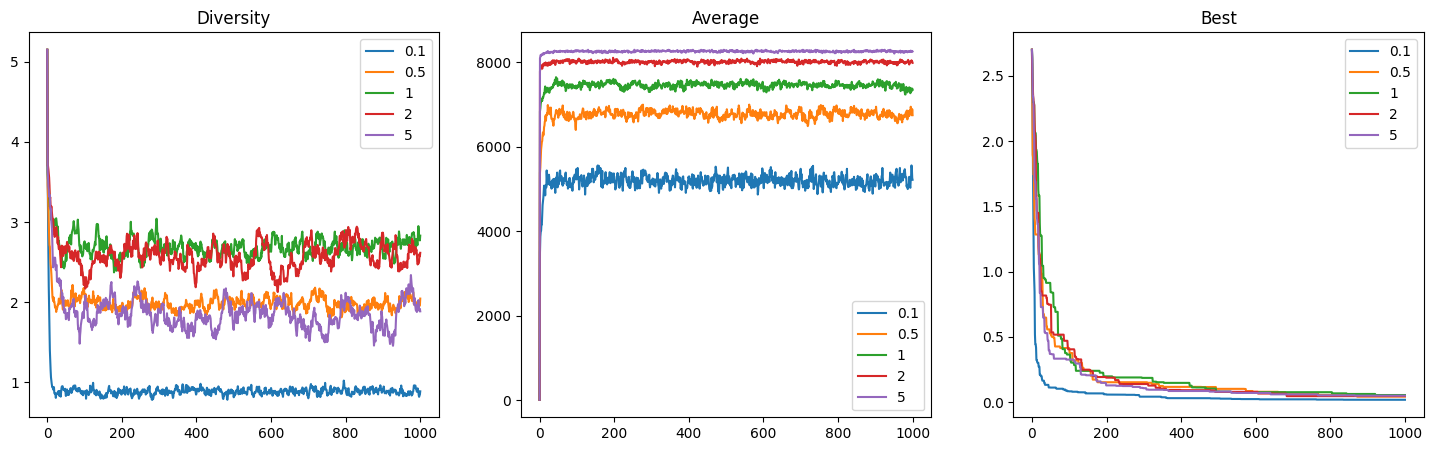

,x,y,score
0.1,-0.002395,0.006326,0.020350
0.5,0.018657,-0.006694,0.066494
1.0,0.008368,0.005293,0.030613
2.0,0.005443,0.007037,0.027269
5.0,-0.015694,0.001260,0.051118


In [8]:
clearing_radiuses = [0.1, 0.5, 1, 2, 5]
diversities, averages, best_scores, best_individuals = compare_evolutionary_parameter(ackley, clearing_radiuses, 'clearing_radius', clearing)
plt_multiple_plots_side_by_side([diversities, averages, best_scores], clearing_radiuses, titles=["Diversity", "Average", "Best"])

df = table_compare_best(best_individuals, clearing_radiuses)
df.T

### Wnioski clearing_radius
Dla clearing_radius = 0.1, mechanizm clearingu praktycznie nie wpływa na działanie algorytmu. Osobniki bardzo zbliżone do siebie traktowane są jako należące do różnych nisz. W takiej sytuacji, clearing prowadzi do nadmiernej eksploatacji.

Z drugiej strony, dla wartości 5, jako jedna nisza traktowana jest bardzo duża część przestrzeni poszukiwań. Można to też zauważyć na wykresie średnich wyników - bardzo duży odsetek populacji zostaje oznaczony jako cleared, ponieważ wiele osobników konkuruje w tej samej niszy, a jej ograniczona pojemność dodatkowo odrzuca bardzo dużo potencjalnie obiecujących rozwiązań. Zbyt duża wartość clearing_radius skutkuje ignorowaniem potencjalnych optimów lokalnych.

Algorytmy z wszystkimi wartościami parametru w końcu znalazły optima o podobnych wartościach, lecz różnorodności populacji znacząco się różniły. Pod tym względem, dla tego problemu najlepiej sprawdziły się wartości 1 i 2, dla których różnorodność populacji utrzymywała się dosyć stabilnie na pożądanym poziomie.  

### Wpływ `niche_capacity` na clearing

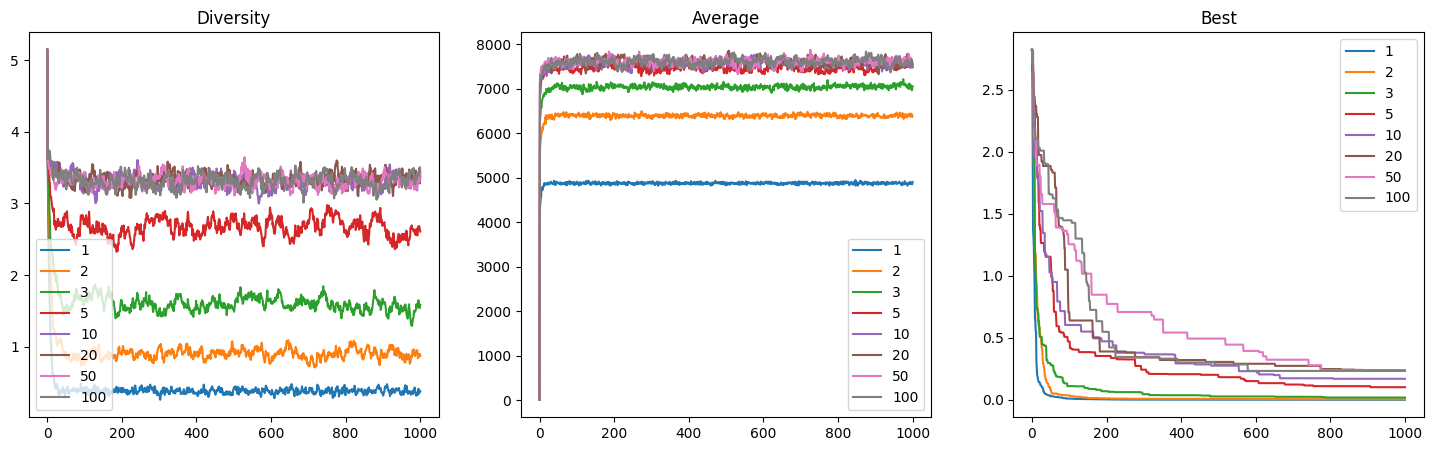

,x,y,score
1,4.919851e-08,-5.926189e-08,2.178527e-07
2,-6.603143e-05,5.901510e-04,1.689005e-03
3,-5.862377e-03,7.738705e-03,2.996806e-02
5,-2.232766e-02,2.458141e-02,1.230777e-01
10,-6.881106e-02,3.327244e-02,3.653611e-01
20,2.199792e-02,-4.379562e-02,2.014879e-01
50,5.276943e-03,7.864907e-02,3.802529e-01
100,1.999673e-02,1.948905e-02,9.963330e-02


In [ ]:
niche_capacities = [1, 2, 3, 5, 10]
diversities, averages, best_scores, best_individuals = compare_evolutionary_parameter(ackley, niche_capacities, 'niche_capacity', clearing)
plt_multiple_plots_side_by_side([diversities, averages, best_scores], niche_capacities, titles=["Diversity", "Average", "Best"])

df = table_compare_best(best_individuals, niche_capacities)
df.T

### Wnioski niche_capacity
Dla wysokich wartości niche_capacity (20, 50, 100), mechanizm clearingu nie daje dużego nacisku na eksploitację, co jest odzwierciedlone w znalezionych minimach. Również, duża część populacji może zostać potraktowana jako jedna nisz, lecz to zjawisko raczej nie występuje przy jednoczesnym niskim clearing_radius.

Dla niskich wartości natomiast, w każdej niszy tylko jeden, bądż kilka osobników ma szansę przetrwać. Skutkuje to bardzo silną presją selekcyjną, a populacja szybko koncentruje się wokół najlepszych znalezionych rozwiązań.

Uważamy, że optymalna wartość dla tego problemu to 3.

Kluczowy jest balans między clearing_radius, a niche_capacity, gdyż są one ze sobą ściśle związane. Jeśli clearing_radius ma wysoką wartość, niche_capacity też powinno to odzwierciedlać, chyba że znamy dokładnie przestrzeń przeszukiwań i wiemy np., że minima lokalne są od siebie bardzo oddalone. Oba te parametry powinny też uwzględniać interesujący nas rozmiar przestrzeni przeszukiwań.

## Animacja działania algorytmów

Aby wizualnie ukazać różnice w działaniu mechanizmów clearingu i crowdingu w porównaniu z klasycznym algorytmem genetycznym, przygotowaliśmy animację ilustrującą ich przebiegi na odgórnym rzucie funkcji testowych. W animacji przedstawiono ewolucję populacji w trakcie 1000 iteracji, co pozwala lepiej zrozumieć dynamikę i efektywność każdego z podejść.

In [2]:
# generate_animation(ackley, "ackley_base")
# generate_animation(ackley, "ackley_clearing", clearing)
generate_animation(ackley, "ackley_crowding", crowding)

# generate_animation(rastrigin, "rastrigin_base")
# generate_animation(rastrigin, "rastrigin_clearing", clearing)
generate_animation(rastrigin, "rastrigin_crowding", crowding)

# generate_animation(rosenbrock, "rosenbrock_base")
# generate_animation(rosenbrock, "rosenbrock_clearing", clearing)
generate_animation(rosenbrock, "rosenbrock_crowding", crowding)


![](./clearing_crowding.gif)

### Wnioski
Pomimo różnic między funkcjami testowymi, widać wyraźną schematyczność w sposobie, w jaki każda z metod eksploruje przestrzeń przeszukiwań. 

Algorytm, który nie korzysta z dodatkowych mechanizmów wspierających różnorodność, szybko zbliża się do minimum. W kolejnych iteracjach, dzięki mutacji, generuje jedynie drobne zmiany w osobnikach, które w wyniku krzyżowania i selekcji ponownie wracają do minimum. 

Z kolei algorytm z mechanizmem Clearingu wyraźnie formuje liczne nisze, w których gromadzą się podobne osobniki. Te nisze efektywnie eksplorują przestrzeń problemu, a z każdą iteracją stopniowo zbliżają się do minimum globalnego. 

Algorytm z mechanizmem Crowdingu najlepiej rozpina przestrzeń całego problemu, zapewniając szeroką eksplorację, ale jednocześnie widać u niego brak eksploitacji, która była obecna w dwóch poprzednich algorytmach. 

## Porównanie działania algorytmów na funkcjach testowych

### Funkcja Ackleya

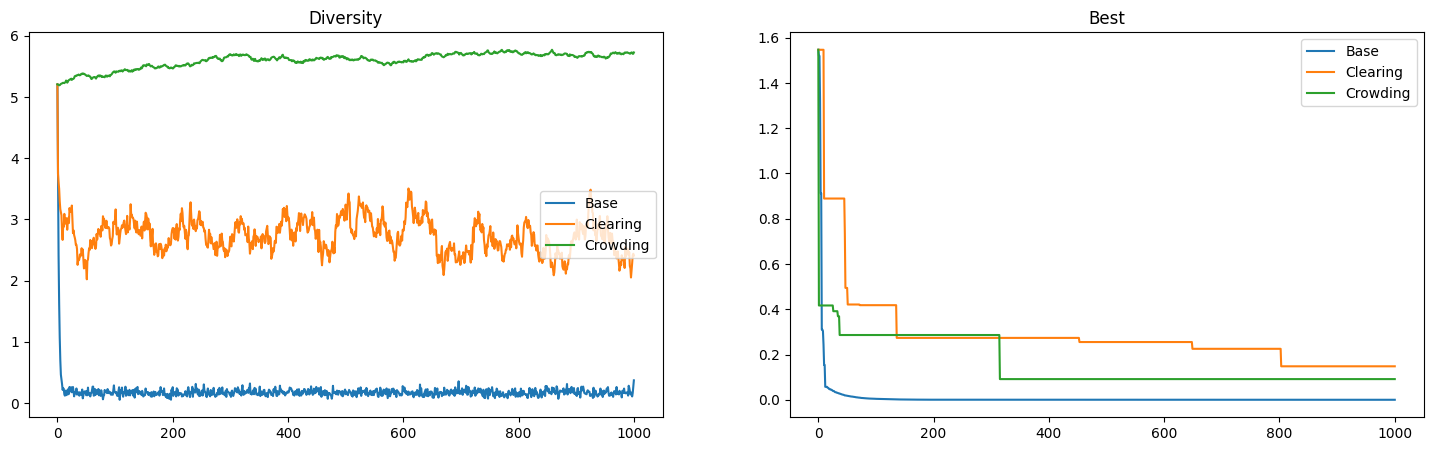

In [3]:
legend = ["Base", "Clearing", "Crowding"]
diversities, _, best_scores, _ = compare_diversity_best(ackley)

plt_multiple_plots_side_by_side([diversities, best_scores], legend, titles=["Diversity", "Best"])

### Funkcja Rastrigina

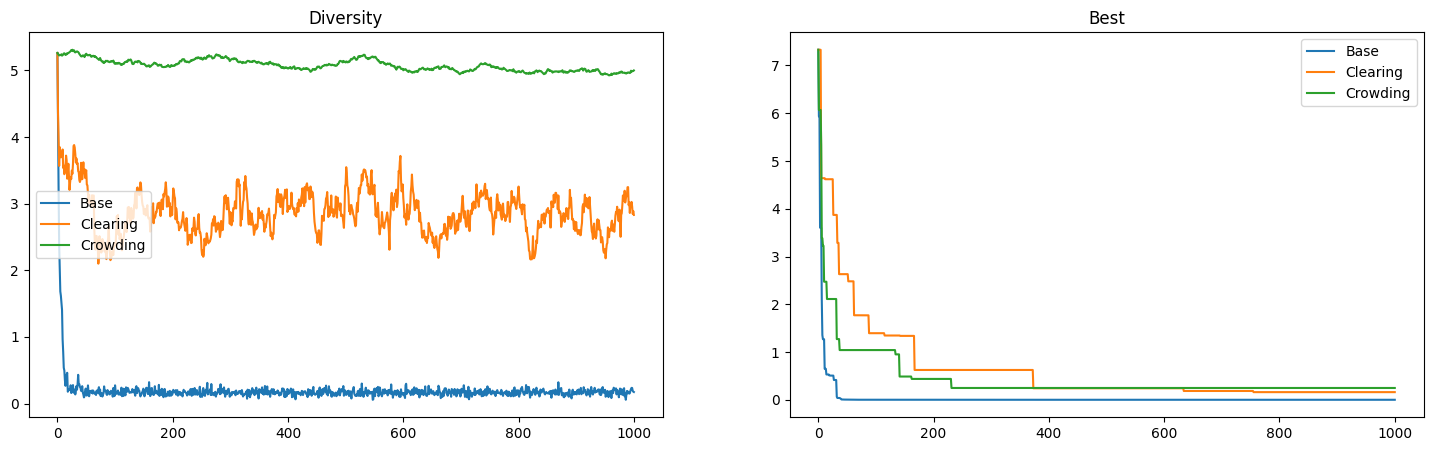

In [4]:
legend = ["Base", "Clearing", "Crowding"]
diversities, _, best_scores, _ = compare_diversity_best(rastrigin)

plt_multiple_plots_side_by_side([diversities, best_scores], legend, titles=["Diversity", "Best"])

### Funkcja Rosenbrocka

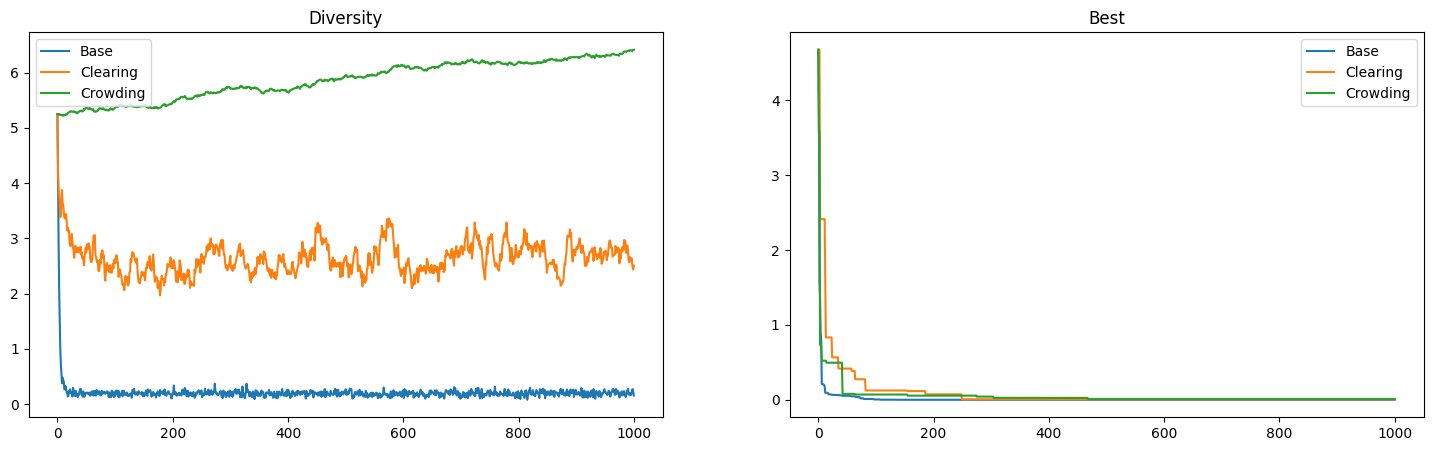

In [5]:
legend = ["Base", "Clearing", "Crowding"]
diversities, _, best_scores, _ = compare_diversity_best(rosenbrock)

plt_multiple_plots_side_by_side([diversities, best_scores], legend, titles=["Diversity", "Best"])

## Wnioski

Algorytmy clearingu i crowdingu bardzo efektywnie zwiększają różnorodność populacji w algorytmach genetycznych. Implementacja tych metod nie wymaga znaczących zmian w podstawowej strukturze algorytmu genetycznego, a może ciągnąć za sobą wiele korzyści.

Bazowa implementacja algorytmu genetycznego wykazuje tendencję do szybkiej zbieżności do pojedynczego minimum, które niekoniecznie jest optimum globalnym. W kolejnych generacjach za sprawą samej mutacji, algorytm może się wyłamać i zacząć eksplorację na nowo. Jest to jednak mało prawdopodobne. Jak widać na powyższych wykresach różnorodność populacji dla klasycznej wersji tego algorytmu jest praktycznie stale zerowa po kilku pierwszych generacjach.

Clearing i Crowding pozwalają znaleźć dużo akceptowalnie dobrych rozwiązań w przestrzeni wielomodalnej, przy relatywnie niewielkiej liczbie generacji. Może to być efekt pożądany, np. gdy chcemy, w krótkim czasie działania algorytmu, znaleźć wiele znacząco różniących się od siebie rozwiązań, które można użyć następnie jako punkty startowe do bardziej szczegółowej optymalizacji lokalnej lub analizy eksperckiej.

### Potencjalne usprawnienia
Skuteczność algorytmów można zwiększyć poprzez wprowadzenie dynamicznej adaptacji hiperparametrów w trakcie procesu ewolucjnego. W początkowej fazie poszukiwań, algorytm może priorytetyzować różnorodności populacji i eksploracji, by w późniejszych generacjach skupić się na eksploitacji najbardziej obiecujących obszarów.